1. Do basic EDA( ex value counts countplot scatterplot etc )
2. Do necessary preprocessing like encoding cleaning scaling
3. Drop unnecessary features if needed
4. Create different classification models
5. Create Confusion matrix and Classification Report for each model

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [48]:
df = pd.read_csv('home_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df.drop('Loan_ID',axis=1,inplace=True)

In [50]:
df.shape

(614, 12)

In [51]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [53]:
# df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
# df['Married']=df['Married'].fillna(df['Married'].mode()[0])
# df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
# df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [54]:
feature = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for i in feature:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [55]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

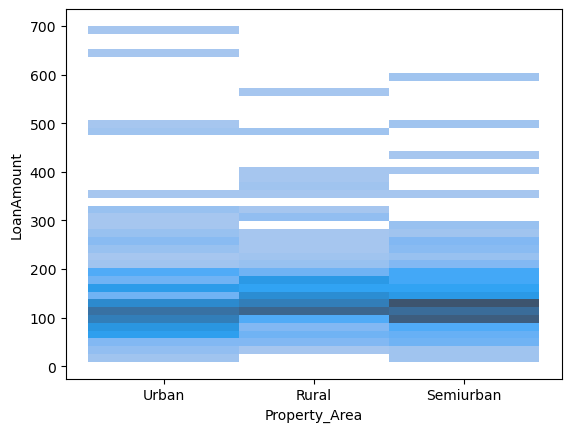

In [57]:
sns.histplot(x='Property_Area',y='LoanAmount',data=df)

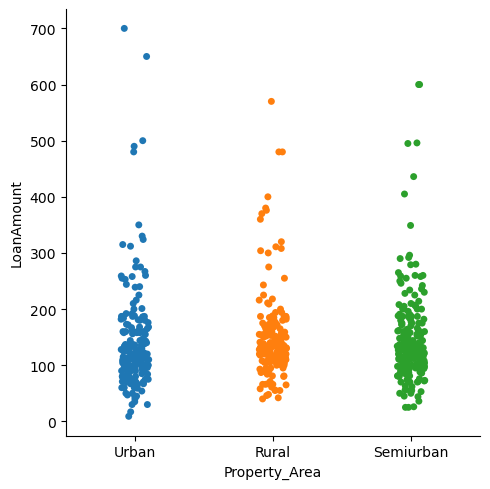

In [58]:
# sns.scatterplot(x='Property_Area',y='LoanAmount',data=df)
sns.catplot(x='Property_Area',y='LoanAmount',data=df)

In [59]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [60]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [61]:
df['LoanAmount']= df['LoanAmount'].fillna(round(df['LoanAmount'].mean()))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

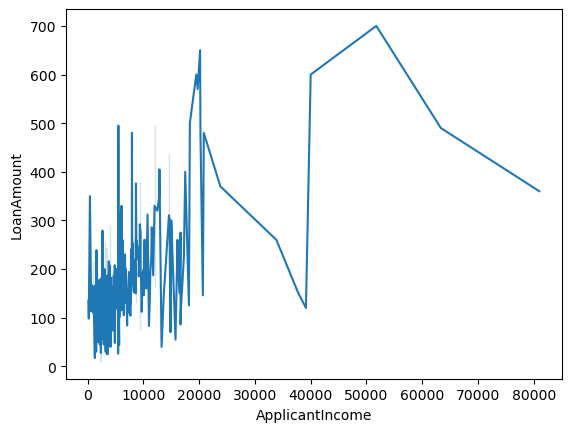

In [62]:
sns.lineplot(y='LoanAmount',x='ApplicantIncome',data=df)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

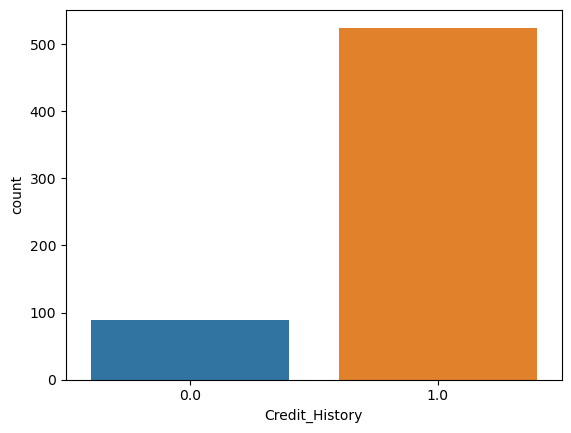

In [63]:
sns.countplot('Credit_History',data=df)

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

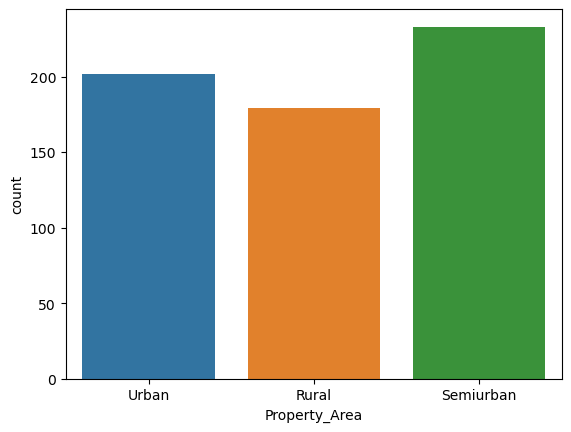

In [65]:
sns.countplot(df['Property_Area'],data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

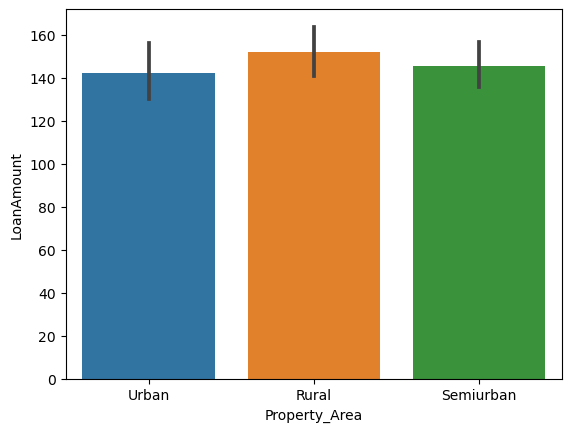

In [66]:
sns.barplot(x='Property_Area',y='LoanAmount',data=df)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


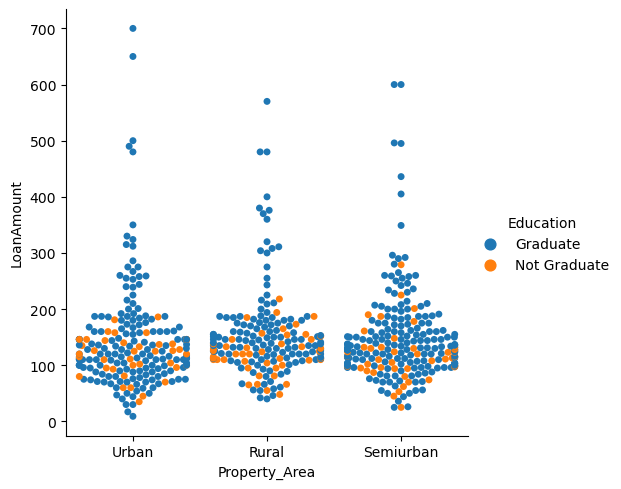

In [67]:
sns.catplot(x='Property_Area',y='LoanAmount',data=df,hue='Education',kind='swarm')

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

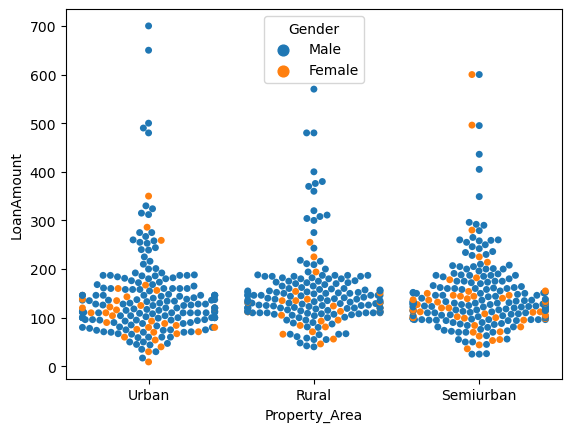

In [68]:
sns.swarmplot(x='Property_Area',y='LoanAmount',data=df,hue='Gender')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    uint8  
 1   Married            614 non-null    uint8  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    uint8  
 4   Self_Employed      614 non-null    uint8  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    uint8  
dtypes: float64(4), int64(1), object(2), uint8(5)
memory usage: 36.7+ KB


In [70]:
li = ['Gender','Married','Education','Self_Employed','Loan_Status']
for i in li:
    df[i] = pd.get_dummies(df[i],drop_first=True)

In [77]:
df1= pd.get_dummies(df['Property_Area'],drop_first=True)

In [81]:
df_final = pd.concat([df,df1],axis=1).drop('Property_Area',axis=1)
df_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

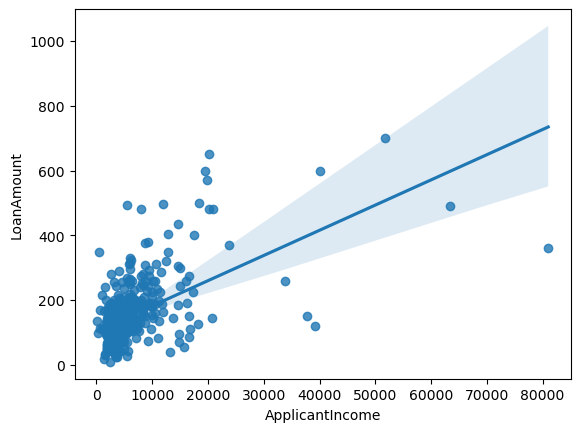

In [75]:
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

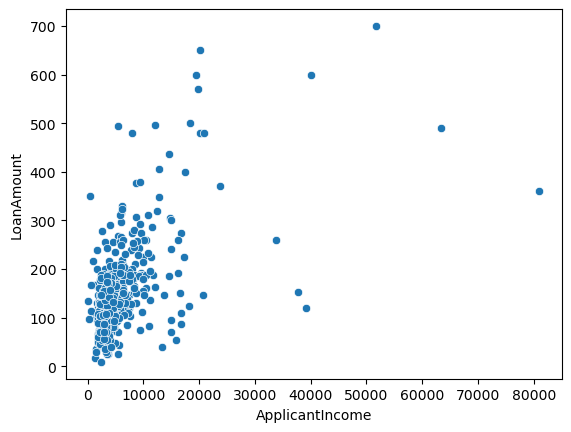

In [76]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

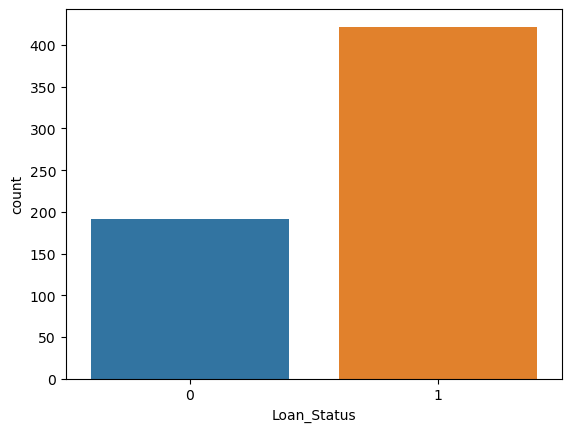

In [119]:
sns.countplot(data=df , x='Loan_Status') # imbalanced

In [102]:
df_final['Dependents']=df_final['Dependents'].replace('3+',3)

In [103]:
df_final['Dependents']=df_final['Dependents'].astype(int)

In [104]:
df_final['Dependents'].unique()

array([0, 1, 2, 3])

In [105]:
X = df_final.drop('Loan_Status',axis=True)
y = df_final.Loan_Status

## Standardization

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

## Train Test Split

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,test_size=0.30,random_state=44)

## Model

#### LogisticRegression

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [122]:
model.score(X_train,y_train)

0.7995337995337995

In [121]:
model.score(X_test,y_test)

0.8432432432432433

In [110]:
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [114]:
accuracy_score(y_test,y_pred)

0.8432432432432433

In [112]:
confusion_matrix(y_test,y_pred)

array([[ 26,  24],
       [  5, 130]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.52      0.64        50
           1       0.84      0.96      0.90       135

    accuracy                           0.84       185
   macro avg       0.84      0.74      0.77       185
weighted avg       0.84      0.84      0.83       185



#### DecisionTree

In [140]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [141]:
model1.score(X_train,y_train)

1.0

In [142]:
model1.score(X_test,y_test)

0.6810810810810811

In [143]:
y_pred1 = model1.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred1)

0.6810810810810811

In [145]:
confusion_matrix(y_test,y_pred1)

array([[30, 20],
       [39, 96]], dtype=int64)

In [146]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50        50
           1       0.83      0.71      0.76       135

    accuracy                           0.68       185
   macro avg       0.63      0.66      0.63       185
weighted avg       0.72      0.68      0.69       185



#### SVM

In [155]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train,y_train)

SVC()

In [156]:
model2.score(X_train,y_train)

0.8088578088578089

In [157]:
model2.score(X_test,y_test)

0.8378378378378378

In [158]:
y_pred2 = model2.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred2)

0.8378378378378378

In [160]:
confusion_matrix(y_test,y_pred2)

array([[ 26,  24],
       [  6, 129]], dtype=int64)

In [161]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        50
           1       0.84      0.96      0.90       135

    accuracy                           0.84       185
   macro avg       0.83      0.74      0.76       185
weighted avg       0.83      0.84      0.83       185



## AFTER USING SMOTE

In [131]:
from imblearn.over_sampling import SMOTE
re_sm = SMOTE()
X_re,y_re = re_sm.fit_resample(X_train,y_train)

In [132]:
from sklearn.linear_model import LogisticRegression
model_re = LogisticRegression()
model_re.fit(X_re,y_re)

LogisticRegression()

In [133]:
y_pred_re = model.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [135]:
accuracy_score(y_test,y_pred_re)

0.7567567567567568

In [136]:
confusion_matrix(y_test,y_pred_re)

array([[ 33,  17],
       [ 28, 107]], dtype=int64)

In [137]:
print(classification_report(y_test,y_pred_re))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59        50
           1       0.86      0.79      0.83       135

    accuracy                           0.76       185
   macro avg       0.70      0.73      0.71       185
weighted avg       0.78      0.76      0.76       185



In [ ]:
# After smote precision decreases -- I think here value of precision is imp than recall 